**Other Excellent Sample Answers:**

https://github.com/JifuZhao/DS-Take-Home/blob/master/01.%20Conversion%20Rate.ipynb
https://github.com/stasi009/TakeHomeDataChallenges/blob/master/01.ConversionRate/Report.ipynb

**Challenge Description:**

We have data about users who hit our site: whether they converted or not as well as some of their characteristics such as their country, the marketing channel, their age, whether they are repeat users and the number of pages visited during that session (as a proxy for site activity/time spent on site).
Your project is to:
Predict conversion rate
Come up with recommendations for the product team and the marketing team to improve conversion rate

**Data Columns:**
- country : user country based on the IP address
- age : user age. Self-reported at sign-in step
- new_user : whether the user created the account during this session or had already an account and simply came back to the site
- source : marketing channel source
    - Ads: came to the site by clicking on an advertisement
    - Seo: came to the site by clicking on search results
    - Direct: came to the site by directly typing the URL on the browser
- total_pages_visited: number of total pages visited during the session. This is a proxy for time spent on site and engagement during the session.
- converted: this is our label. 1 means they converted within the session, 0 means they left without buying anything. The company goal is to increase conversion rate: # conversions / total sessions.


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

## Read Data

In [4]:
data = pd.read_csv('conversion_data.csv')

## Exploratory Data Analysis

In [5]:
data.head().append(data.tail())

/var/folders/8f/zn20y3z53vj3ln91y64pcf2w0000gn/T/ipykernel_18897/3952687545.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data.head().append(data.tail())


,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
316195,US,26,1,Ads,9,0
316196,US,27,1,Direct,6,0
316197,China,25,0,Ads,4,0
316198,US,22,0,Seo,4,0
316199,UK,24,0,Ads,4,0


In [6]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7fdc7289e1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdc7289e850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdc72883ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdc7289ed30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdc728b1040>],
 'means': []}

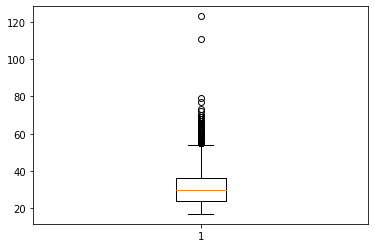

In [7]:
plt.boxplot(data.age)

In [8]:
np.sort(data.age.unique())

array([ 17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  72,  73,  77,  79, 111, 123])

- Sample Restriction on `age`

In [9]:
data = data.loc[data.age < 100]

(array([2.5412e+04, 2.1122e+04, 2.4037e+04, 2.6420e+04, 2.8015e+04,
        2.8499e+04, 2.8038e+04, 2.6138e+04, 2.3579e+04, 2.0540e+04,
        1.7172e+04, 1.3549e+04, 1.0492e+04, 7.8580e+03, 5.4980e+03,
        5.1060e+03, 2.0280e+03, 1.1470e+03, 6.8000e+02, 4.1200e+02,
        2.2100e+02, 1.3000e+02, 6.2000e+01, 2.4000e+01, 1.0000e+01,
        5.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([17.        , 19.06666667, 21.13333333, 23.2       , 25.26666667,
        27.33333333, 29.4       , 31.46666667, 33.53333333, 35.6       ,
        37.66666667, 39.73333333, 41.8       , 43.86666667, 45.93333333,
        48.        , 50.06666667, 52.13333333, 54.2       , 56.26666667,
        58.33333333, 60.4       , 62.46666667, 64.53333333, 66.6       ,
        68.66666667, 70.73333333, 72.8       , 74.86666667, 76.93333333,
        79.        ]),
 <BarContainer object of 30 artists>)

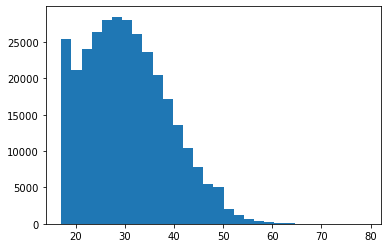

In [12]:
plt.hist(data.age, bins=30)

Text(0.5, 1.0, 'Number ~ Country')

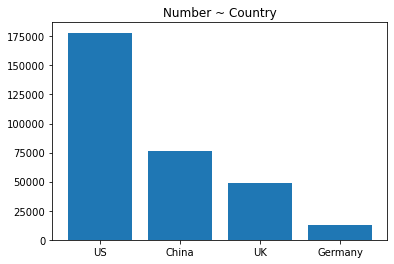

In [11]:
country_tab = data.country.value_counts()
plt.bar(country_tab.index, country_tab)
plt.title('Number ~ Country')

Text(0.5, 1.0, 'Conversion ~ Country')

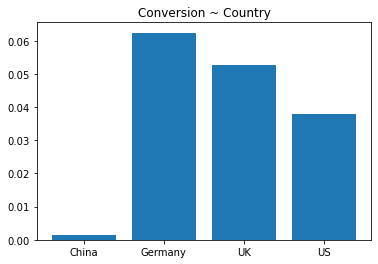

In [13]:
converted_country = data.groupby('country')['converted'].mean()
plt.bar(converted_country.index)
plt.title('Conversion ~ Country')

Conversion rate of China is extremely low. From the product perspective, it might be caused by bad Chinese translation.

Text(0.5, 1.0, 'Conversion ~ Age')

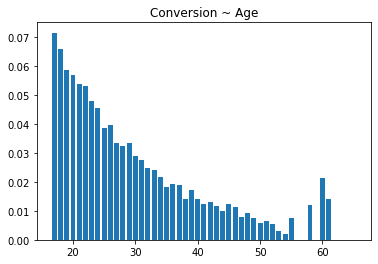

In [28]:
converted_age = data.groupby('age')['converted'].mean()
plt.bar(converted_age.index, converted_age)
plt.title('Conversion ~ Age')

Text(0.5, 1.0, 'Conversion ~ Source')

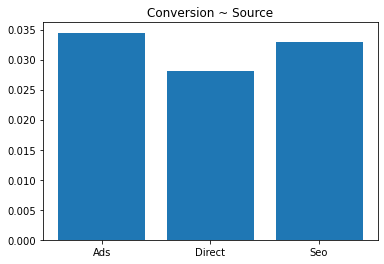

In [12]:
converted_source = data.groupby('source')['converted'].mean()
plt.bar(converted_source.index, converted_source)
plt.title('Conversion ~ Source')

Text(0.5, 1.0, 'Conversion ~ Total Pages Visited')

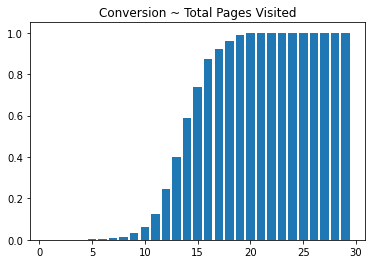

In [13]:
converted_pages = data.groupby('total_pages_visited')['converted'].mean()
plt.bar(converted_pages.index, converted_pages)
plt.title('Conversion ~ Total Pages Visited')

## Modeling

In [14]:
X = data.iloc[:, 0:data.shape[1]-1]
X = pd.get_dummies(X)
y = data['converted']

In [15]:
y.mean()

0.03225194340255157

The target `converted` has two values 0 and 1. The average is 0.032. It means that the target '1' is only 3.2% in our sample, which is very imbalanced. 

- Data Spliting

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

- Standardization

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [90]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
# mm = MinMaxScaler()
# X_train = mm.fit_transform(X_train)

- Model Fitting

In [91]:
lrcv_2 = LogisticRegressionCV(Cs=np.logspace(-3,3,5), 
    penalty='l1',
    solver='liblinear',
    # class_weight='balanced',
    max_iter=1000,
    n_jobs=-1
    )
lrcv_2.fit(X_train, y_train)

LogisticRegressionCV(Cs=array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                     max_iter=1000, n_jobs=-1, penalty='l1',
                     solver='liblinear')

In [92]:
lrcv_2.coef_, lrcv_2.n_iter_, lrcv_2.intercept_

(array([[-0.6019269 , -0.81197497,  2.52778396, -1.37415821,  0.11914791,
          0.12545762,  0.        ,  0.00469427, -0.07205928,  0.        ]]),
 array([[[16, 24, 26, 30, 25],
         [17, 24, 25, 22, 24],
         [21, 19, 22, 27, 25],
         [18, 26, 24, 26, 23],
         [17, 22, 27, 28, 25]]], dtype=int32),
 array([-7.59219059]))

- Model Validation

In [97]:
# standardization X_test with X_train's parameters
X_test = ss.transform(X_test)
# X_test = mm.transform(X_test)

In [94]:
[lrcv_2.score(X_train, y_train), lrcv_2.score(X_test, y_test)]

[0.9859445734577885, 0.9868121442125237]

In [95]:
y_test_pred = lrcv_2.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     91801
           1       0.86      0.71      0.78      3059

    accuracy                           0.99     94860
   macro avg       0.93      0.85      0.88     94860
weighted avg       0.99      0.99      0.99     94860



In [100]:
# precision by chance
1 - np.mean(y_test)

0.96775247733502

For target '1' that is converted, the 0.86 precision means that 86% of the data that our model predict as converted are truely converted, and the 0.71 recall means that 71% of truely converted data are predicted successfully by our model. 

For target '0', the precision by chance is 0.968, which means if our model guess all test data as '0', the precision can also be 0.967. But now our model get a precision of 0.99 for '0', which suggests our model is more precise than by chance. 

In [96]:
feat_importance = pd.DataFrame({'column': X.columns, 'coef':lrcv_2.coef_[0]})
feat_importance['importance'] = np.abs(feat_importance.coef)
feat_importance.sort_values(by='importance', ascending=False)

,column,coef,importance
2,total_pages_visited,2.527784,2.527784
3,country_China,-1.374158,1.374158
1,new_user,-0.811975,0.811975
0,age,-0.601927,0.601927
5,country_UK,0.125458,0.125458
4,country_Germany,0.119148,0.119148
8,source_Direct,-0.072059,0.072059
7,source_Ads,0.004694,0.004694
6,country_US,0.000000,0.000000
9,source_Seo,0.000000,0.000000


From this table, we can know the importance of different features to conversion rate. According to the high importance feature and their direction, we have several ways to improve our conversion rate. 
1. Make the title of links on our website more interesting or more relevant to the page a user viewed to attract people to explore more pages. 
2. Take a survey on Chinese users to dig out the reason why they don't want to stay at our website. 
3. Provide more benefits to retain old (not age) users. 
4. Hold more activities to attract young people. 
5. Provide a mode to make it easier to use for old (age) people. 
6. Place more ads towards German users. 